In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%run ../Clustering.ipynb

In [2]:
d = {
    'latitude': [x for x in range(-90, 90)]*360,
    'longitude': [x for x in range(-180, 180) for y in range(180)],
}

def generate_parameter_values(latitude, longitude):
    if latitude + longitude > 30:
        return([
            numpy.random.normal(loc=10.0, scale=5.0),
            numpy.random.normal(loc=10.0, scale=5.0),
            numpy.random.normal(loc=20.0, scale=5.0)
               ])
    elif latitude + 2*longitude < -20:
        return([
            numpy.random.normal(loc=20.0, scale=5.0),
            numpy.random.normal(loc=10.0, scale=5.0),
            numpy.random.normal(loc=10.0, scale=5.0)
               ])
    else:
        return([
            numpy.random.normal(loc=15.0, scale=5.0),
            numpy.random.normal(loc=10.0, scale=5.0),
            numpy.random.normal(loc=15.0, scale=5.0)
               ])

parameters = pd.DataFrame(data=[generate_parameter_values(d["latitude"][i], d["longitude"][i]) 
                                for i in range(len(d["longitude"]))],
                          columns=['a', 'b', 'c'])

data = pd.concat([pd.DataFrame(data=d),
                  parameters],
                 axis=1)

print(data)

       latitude  longitude          a          b          c
0           -90       -180  10.783054   6.808924   9.240678
1           -89       -180  25.602941  10.278323  10.041987
2           -88       -180  19.436647   1.323638   4.824321
3           -87       -180  24.085246  15.950272   9.403284
4           -86       -180  14.522376   7.645182  12.607599
...         ...        ...        ...        ...        ...
64795        85        179  13.373844  13.935698  23.358624
64796        86        179  13.298382   7.289949  26.921429
64797        87        179  -2.063806  18.577570  21.759354
64798        88        179   8.597558  21.849884  13.967654
64799        89        179  16.118079  12.669213  15.819368

[64800 rows x 5 columns]


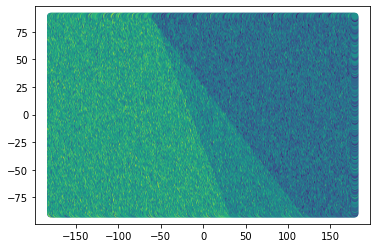

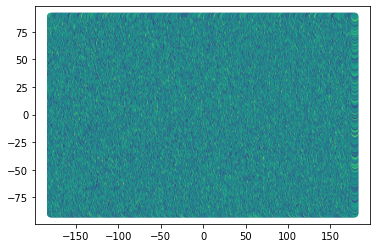

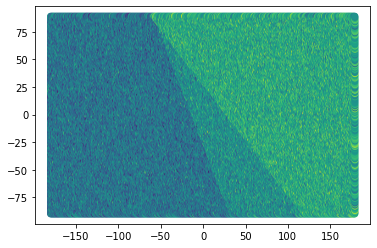

In [3]:
plt.scatter(data.longitude, data.latitude, c=data.a)
plt.show()

plt.scatter(data.longitude, data.latitude, c=data.b)
plt.show()

plt.scatter(data.longitude, data.latitude, c=data.c)
plt.show()

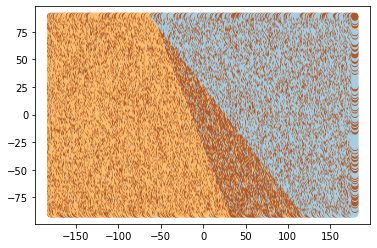

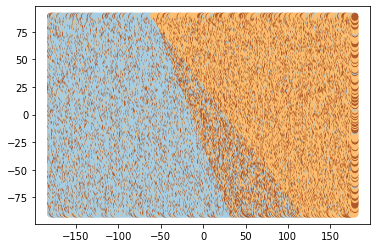

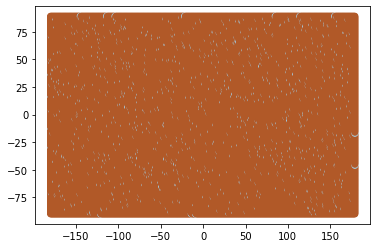

In [4]:
data["clusters_k_means"] = k_means(data[['a','b','c']], 3)[0]
data["clusters_agglom"] = agglom(data[['a','b','c']], 3)
data["clusters_dbscan"] = dbscan(data[['a','b','c']], eps=5, min_samples=1000)

plt.scatter(data.longitude, data.latitude, c=data.clusters_k_means, cmap='Paired')
plt.show()

plt.scatter(data.longitude, data.latitude, c=data.clusters_agglom, cmap='Paired')
plt.show()

plt.scatter(data.longitude, data.latitude, c=data.clusters_dbscan, cmap='Paired')
plt.show()